Author: “Sumana Biswas”
Copyright: “Sumana Biswas 2021”


#LSTM model to forecast some influential features specification 

# Install Python libraries

In [2]:
from keras.models import Sequential

In [9]:
from keras.layers import Dense, LSTM

In [10]:
from numpy import array

In [11]:
from numpy.random import uniform

In [12]:
from numpy import hstack

In [13]:
import matplotlib.pyplot as plt

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
from sklearn.metrics import mean_squared_error

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
import pandas as pd


In [19]:
from keras.layers import Dropout

# Data Set 
# Loading data


In [20]:
dataset_forcasting= pd.read_csv('C:\\Users\\z5058566\\Desktop\\Test SUP\\Smartphone.csv')

# Input data

In [21]:
X=dataset_forcasting[['Display size','DR (Horizontal)','DR (Vertical)','DRAM memory (MB)','Flash memory (min)','Flash memory (max)','Internet &connectivity-2','Bluetooth-2','Battery capacity','Battery Life (Web-3G)','GPS','Camera','Number of carera','Video','Front Camera','Height','Width','Depth','Sensors','Casing (housing parts) /weight','Min','Max']]

# Target

In [22]:
y=dataset_forcasting[['Touchscreen size','Touchscreen technology-2','OS','Chipset','CPU','Protection']]

# Data normalization

In [29]:
scalerx = MinMaxScaler( feature_range=(0, 1) )

In [30]:
scalery = MinMaxScaler( feature_range=(0, 1) )


In [31]:
datax = scalerx.fit_transform( X )

In [32]:
datay = scalery.fit_transform( y )

#Spliting data into subsets (training and test data)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(datax, datay, test_size=0.3, shuffle=False)


# Print data

In [ ]:
print(X_train)
print(y_train)


# Transforming data for the LSTM model (Data layer reformation into 3D vector)

In [34]:
X_train = X_train.reshape((X_train.shape[0],1,X_train.shape[1]))

In [35]:
X_test = X_test.reshape((X_test.shape[0],1, X_test.shape[1]))

# Print train data

In [36]:
print(X_train.shape)

(10, 1, 22)


In [37]:
print(y_train.shape)

(10, 6)


# LSTM model generation 

In [153]:
model = Sequential()
model.add(LSTM(62, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(32, activation='tanh'))
model.add(Dense(y_train.shape[1]))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_20 (LSTM)               (None, 1, 62)             21080     
_________________________________________________________________
lstm_21 (LSTM)               (None, 32)                12160     
_________________________________________________________________
dense_10 (Dense)             (None, 6)                 198       
Total params: 33,438
Trainable params: 33,438
Non-trainable params: 0
_________________________________________________________________


# Model fitting

In [154]:
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=0)

# Plot

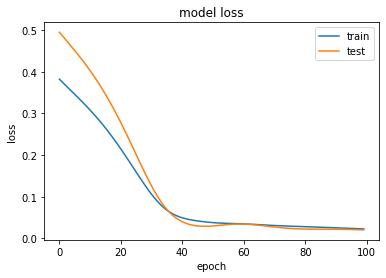

In [105]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('MSE_24.png')
plt.show()

# Prediction

In [155]:
y_pred = model.predict(X_test, verbose=0)

In [65]:
print(y_pred)

[[0.76125777 0.64622664 0.8419294  0.91546714 0.8948324  0.9118862 ]
 [0.5969742  0.5665255  0.79190373 0.86401296 0.8494846  0.80598545]
 [0.5201579  0.50477093 0.73646486 0.8092676  0.7946275  0.73772705]
 [0.41586137 0.3073337  0.5174904  0.53984326 0.5560328  0.5308967 ]
 [0.10627525 0.12075986 0.26810318 0.32431576 0.29420403 0.25435007]]


 # Data de-normalization

In [156]:
y_pred_denorm = scalery.inverse_transform( y_pred )

In [156]:
print(y_pred_denorm)

[[ 6.0250416  4.4741855 12.361812  12.56585   12.512398   6.410573 ]
 [ 5.7700095  4.2973433 12.251866  12.450789  12.184973   6.055047 ]
 [ 5.6665936  4.08358   12.0411    12.172713  11.798483   5.776595 ]
 [ 5.5381174  3.2786045 11.091787  10.78211   10.286959   4.782035 ]
 [ 4.9335465  2.6312647 10.053088   9.621318   8.594649   3.4420526]]


In [114]:
print(y_train)

[[1.         1.         1.         1.         1.         1.        ]
 [1.         0.5        0.75       0.8        0.83333333 0.8       ]
 [0.61111111 0.5        0.75       0.8        0.83333333 0.8       ]
 [0.61111111 0.5        0.525      0.6        0.66666667 0.8       ]
 [0.44444444 0.25       0.5        0.6        0.5        0.6       ]
 [0.         0.25       1.         1.         1.         0.6       ]
 [0.         0.25       0.5        0.6        0.5        0.6       ]
 [0.44444444 0.         0.         0.2        0.16666667 0.2       ]
 [0.         0.25       0.25       0.4        0.33333333 0.4       ]
 [0.44444444 0.         0.         0.         0.         0.        ]]


In [97]:
print(y_test)

[[0.61111111 1.         1.         1.         1.         1.        ]
 [0.77777778 0.75       1.         1.         1.         0.8       ]
 [0.77777778 0.75       0.75       0.8        0.83333333 0.8       ]
 [0.44444444 0.25       0.5        0.4        0.33333333 0.4       ]
 [0.         0.         0.         0.2        0.16666667 0.2       ]]


In [136]:
y_test_denorm = scalery.inverse_transform( y_test)

In [45]:
print(y_test_denorm)

[[ 5.8  6.  13.  13.  13.   7. ]
 [ 6.1  5.  13.  13.  13.   6. ]
 [ 6.1  5.  12.  12.  12.   6. ]
 [ 5.5  3.  11.  10.   9.   4. ]
 [ 4.7  2.   9.   9.   8.   3. ]]


# Plot results

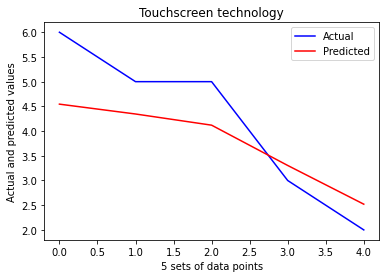

In [160]:
x_ax = range(len(X_test))
plt.title("Touchscreen technology")
plt.plot(x_ax, y_test_denorm[:,1],color='blue', label="Actual")

plt.plot(x_ax, y_pred_denorm[:,1],color='red', label="Predicted")
plt.legend()
plt.ylabel('Actual and predicted values')
plt.xlabel('5 sets of data points')
plt.savefig('Plot_24.png')
plt.show()

In [185]:
print("y1 MSE:%.4f" % mean_squared_error(y_test_denorm[:,0], y_pred_denorm[:,0]))

y1 MSE:0.0850


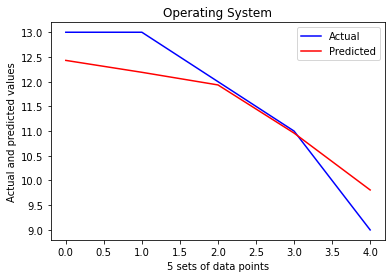

In [161]:
x_ax = range(len(X_test))
plt.title("Operating System")
plt.plot(x_ax, y_test_denorm[:,2], color='blue', label="Actual")

plt.plot(x_ax, y_pred_denorm[:,2],color='red', label="Predicted")
plt.legend()
plt.ylabel('Actual and predicted values')
plt.xlabel('5 sets of data points')
plt.savefig('Plot_34.png')
plt.show()

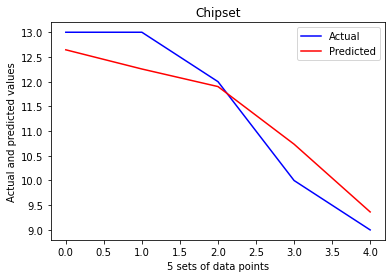

In [162]:
x_ax = range(len(X_test))
plt.title("Chipset")
plt.plot(x_ax, y_test_denorm[:,3], color='blue', label="Actual")

plt.plot(x_ax, y_pred_denorm[:,3],color='red', label="Predicted")
plt.legend()
plt.ylabel('Actual and predicted values')
plt.xlabel('5 sets of data points')
plt.savefig('Plot_44.png')
plt.show()

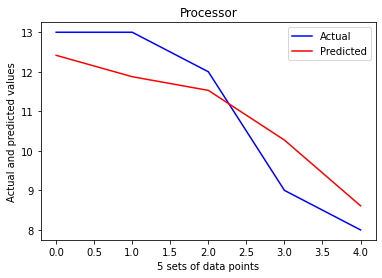

In [163]:
x_ax = range(len(X_test))
plt.title("Processor")
plt.plot(x_ax, y_test_denorm[:,4], color='blue', label="Actual")

plt.plot(x_ax, y_pred_denorm[:,4],color='red', label="Predicted")
plt.legend()
plt.ylabel('Actual and predicted values')
plt.xlabel('5 sets of data points')
plt.savefig('Plot_54.png')
plt.show()

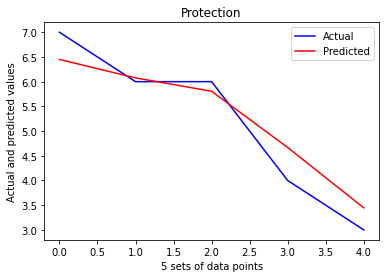

In [164]:
x_ax = range(len(X_test))
plt.title("Protection")
plt.plot(x_ax, y_test_denorm[:,5], color='blue', label="Actual")

plt.plot(x_ax, y_pred_denorm[:,5],color='red', label="Predicted")
plt.legend()
plt.ylabel('Actual and predicted values')
plt.xlabel('5 sets of data points')
plt.savefig('Plot_64.png')
plt.show()

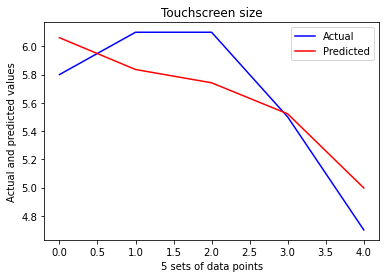

In [165]:
x_ax = range(len(X_test))
plt.title("Touchscreen size")
plt.plot(x_ax, y_test_denorm[:,0], color='blue', label="Actual")

plt.plot(x_ax, y_pred_denorm[:,0],color='red', label="Predicted")
plt.legend()
plt.ylabel('Actual and predicted values')
plt.xlabel('5 sets of data points')
plt.savefig('Plot_14.png')
plt.show()

# Preformance measure

In [74]:
from math import sqrt

In [157]:
mse = mean_squared_error(y_test_denorm, y_pred_denorm)
print('MSE: %f' % mse)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

MSE: 0.395074
RMSE: 0.628549


In [55]:
forecast_errors= [y_test_denorm-y_pred_denorm]

In [77]:
from sklearn.metrics import mean_absolute_error

In [158]:
mae = mean_absolute_error(y_test_denorm, y_pred_denorm)
print('MAE: %f' % mae)

MAE: 0.520221
